## Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] =140
plt.rcParams['text.usetex']=False
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'

## Grab Data

In [180]:
noise_list = [0.0,0.1, 0.2,0.3, 0.4]
imbalance_list = [0.5, 0.8]

df = pd.DataFrame(columns=['alpha','mse', 'imbalance', 'noise'])
kl_df = pd.DataFrame(columns=['alpha', 'kl', 'imbalance', 'noise'])

for (noise,imbalance) in ((n,i) for n in noise_list for i in imbalance_list):
    if 1- imbalance < noise/2: continue
    print(noise,imbalance)
    data = pd.read_pickle('mse_{imbalance}_{noise}.pkl'.format(imbalance=imbalance, noise=noise))
    data['imbalance'] = imbalance
    data['noise'] = noise
    kl_data = pd.read_pickle('kl_{imbalance}_{noise}.pkl'.format(imbalance=imbalance, noise=noise))
    kl_data['imbalance'] = imbalance
    kl_data['noise'] = noise
    df = pd.concat([df,data], ignore_index=True)
    kl_df = pd.concat([kl_df, kl_data], ignore_index=True)


0.0 0.5
0.0 0.8
0.1 0.5
0.1 0.8
0.2 0.5
0.2 0.8
0.3 0.5
0.3 0.8


FileNotFoundError: [Errno 2] No such file or directory: 'mse_0.8_0.3.pkl'

    alpha        kl noise
0     0.5  0.049227   0.0
1     0.5  0.049244   0.0
2     0.5  0.049246   0.0
3     0.5  0.049237   0.0
4     0.5  0.049214   0.0
..    ...       ...   ...
995  20.0  0.005693   0.0
996  20.0  0.006943   0.0
997  20.0  0.006667   0.0
998  20.0  0.005727   0.0
999  20.0  0.006365   0.0

[1000 rows x 3 columns]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


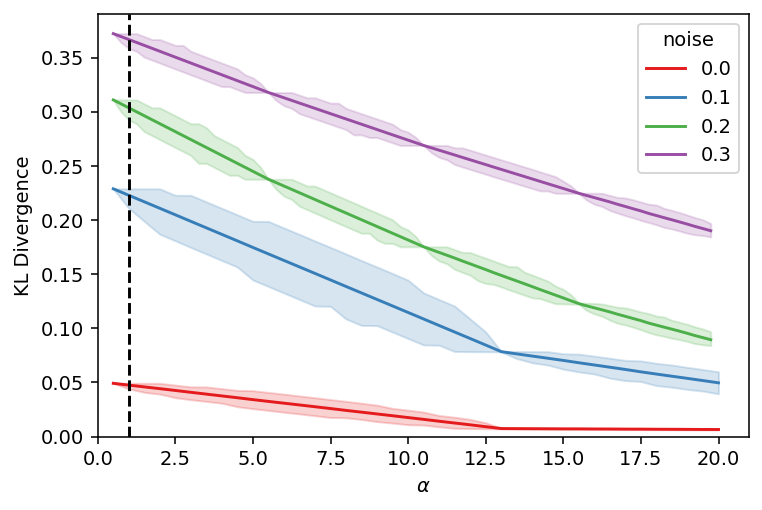

In [181]:
balance=0.5
data = kl_df[kl_df.imbalance==balance][['alpha','kl','noise']]
print(data[data.noise==0.0])
sns.lineplot(x='alpha', y='kl', hue='noise', data=data, palette='Set1')
plt.axvline(1.0, linestyle='dashed', color='black')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'KL Divergence')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.savefig('kldiv_no_title_ci_{b}.eps'.format(b=balance), dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


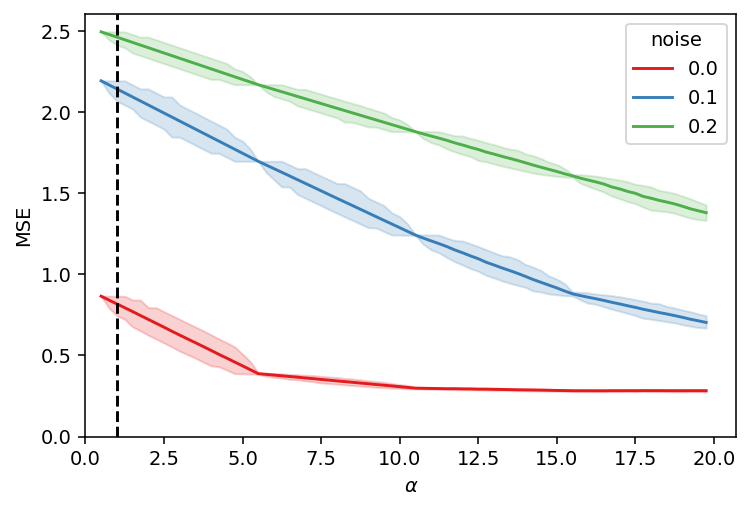

In [ ]:
sns.lineplot(x='alpha', y='mse', hue='noise', data=df[df.imbalance==balance][['alpha','mse','noise']], palette='Set1')
plt.axvline(1.0, linestyle='dashed', color='black')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'MSE')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.savefig('mse_no_title_ci_{b}.eps'.format(b=balance), dpi=1000)

In [ ]:
alpha_list = [0.5, 1.0, 1.5,2.5]
df[[*alpha_list,'noise', 'imbalance']].groupby('imbalance').mean()[alpha_list].plot(title='MSE of Learned Weights and True Weights, Averaged over Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[[*alpha_list,'noise', 'imbalance']].groupby('imbalance').mean()[alpha_list].plot(title='KL of Learned Posterior and True Posterior, Averaged over Noise',xlabel='Imbalance', ylabel=r'KL Divergence')

KeyError: '[0.5, 1.0, 1.5, 2.5] not in index'

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 0 Noise'}, xlabel='Imbalance', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

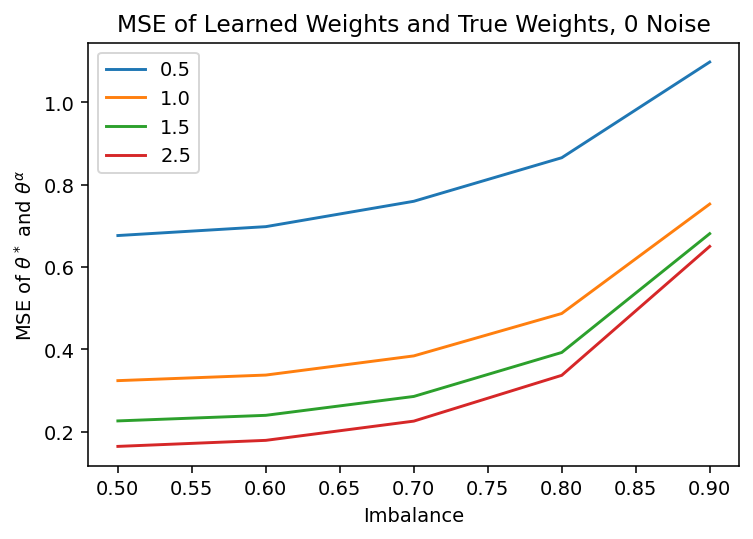

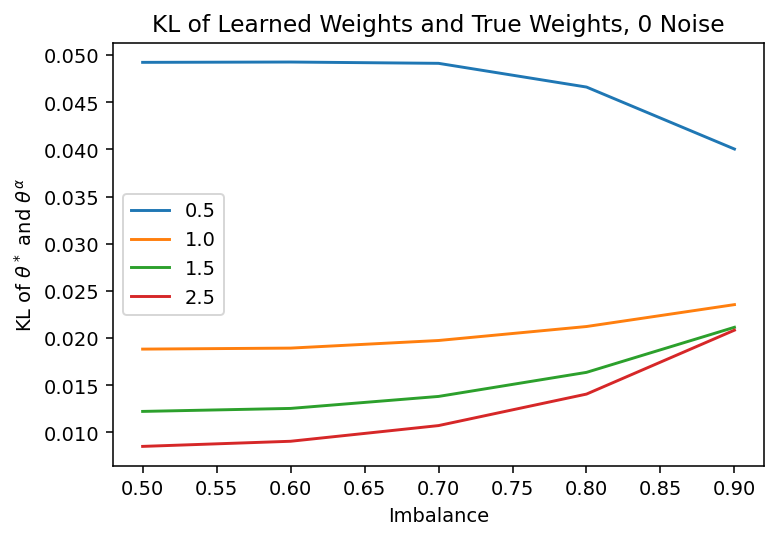

In [ ]:
df[df['noise']==0.0][[*alpha_list, 'imbalance']].plot(x='imbalance',title='MSE of Learned Weights and True Weights, 0 Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df['noise']==0.0][[*alpha_list, 'imbalance']].plot(x='imbalance',title='KL of Learned Weights and True Weights, 0 Noise',xlabel='Imbalance', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 15% Noise'}, xlabel='Imbalance', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

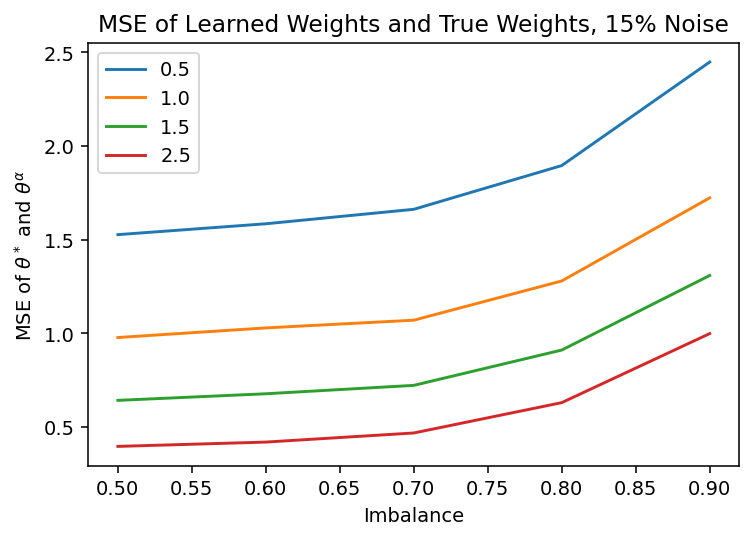

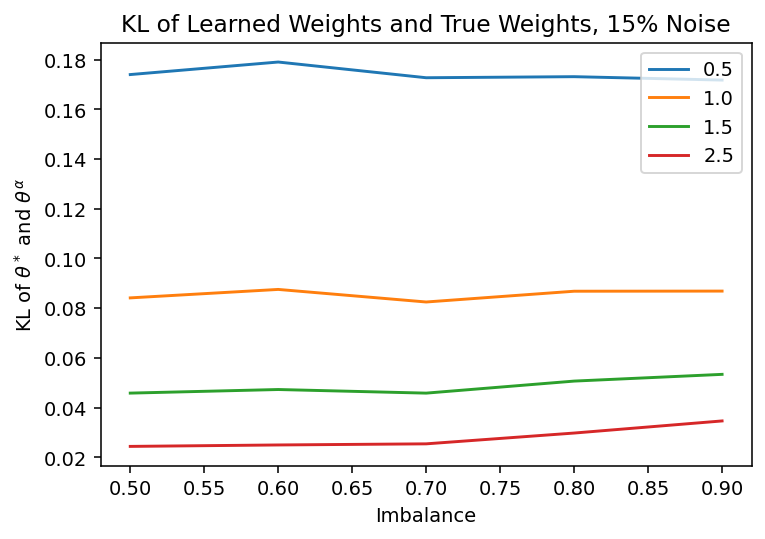

In [ ]:
df[df['noise']==0.05][[*alpha_list, 'imbalance']].plot(x='imbalance',title='MSE of Learned Weights and True Weights, 15% Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df['noise']==0.05][[*alpha_list, 'imbalance']].plot(x='imbalance',title='KL of Learned Weights and True Weights, 15% Noise',xlabel='Imbalance', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, Averaged over Imbalance'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

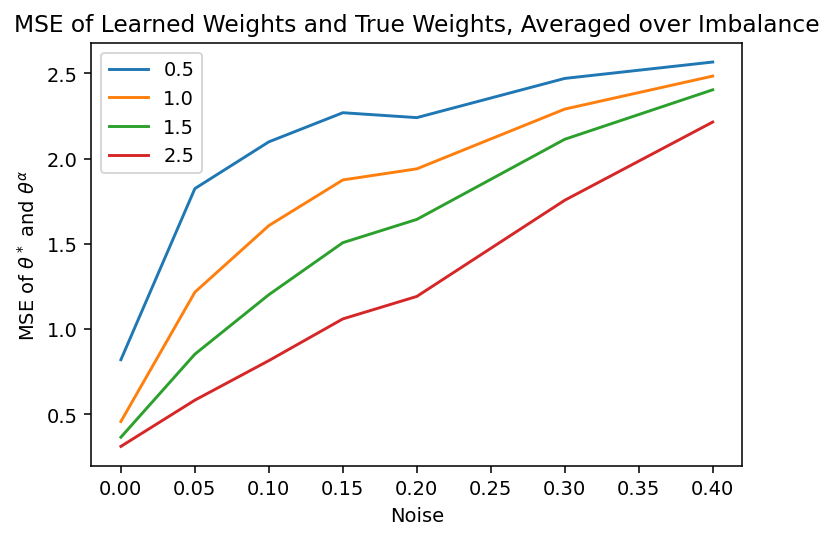

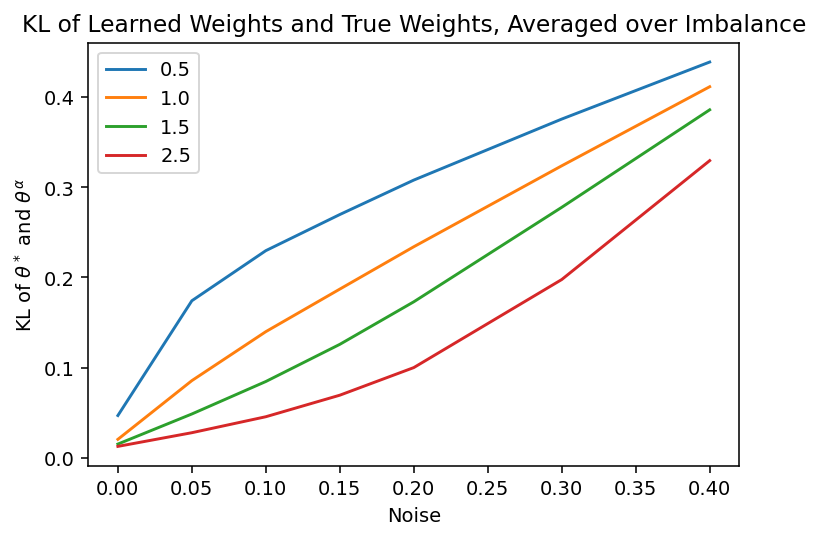

In [ ]:
df[[*alpha_list, 'noise', 'imbalance']].groupby('noise').mean()[alpha_list].plot(title='MSE of Learned Weights and True Weights, Averaged over Imbalance',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[[*alpha_list, 'noise', 'imbalance']].groupby('noise').mean()[alpha_list].plot(title='KL of Learned Weights and True Weights, Averaged over Imbalance',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, Balanced Classes'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

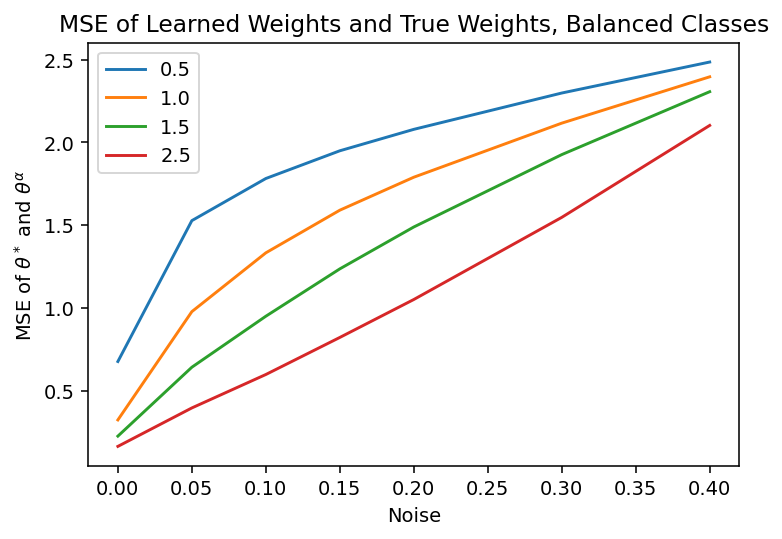

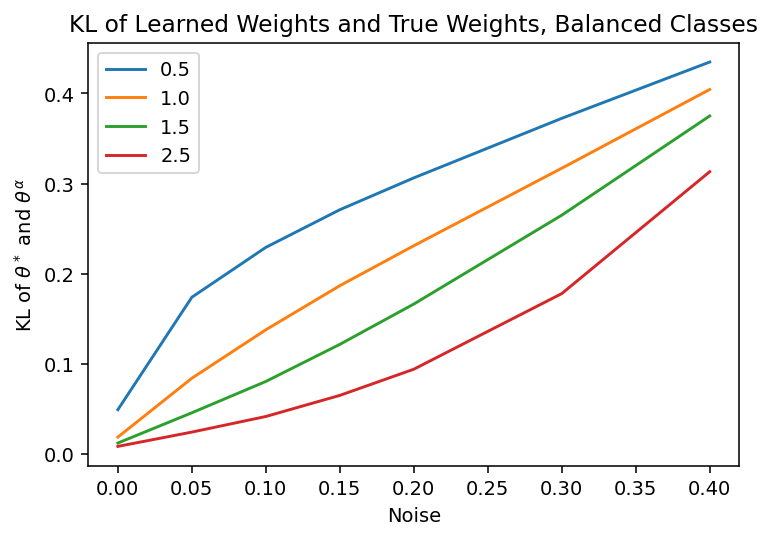

In [ ]:
df[df.imbalance==0.5][[*alpha_list, 'noise']].plot(x='noise',title='MSE of Learned Weights and True Weights, Balanced Classes',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df.imbalance==0.5][[*alpha_list, 'noise']].plot(x='noise',title='KL of Learned Weights and True Weights, Balanced Classes',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 70:30 Imbalance'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

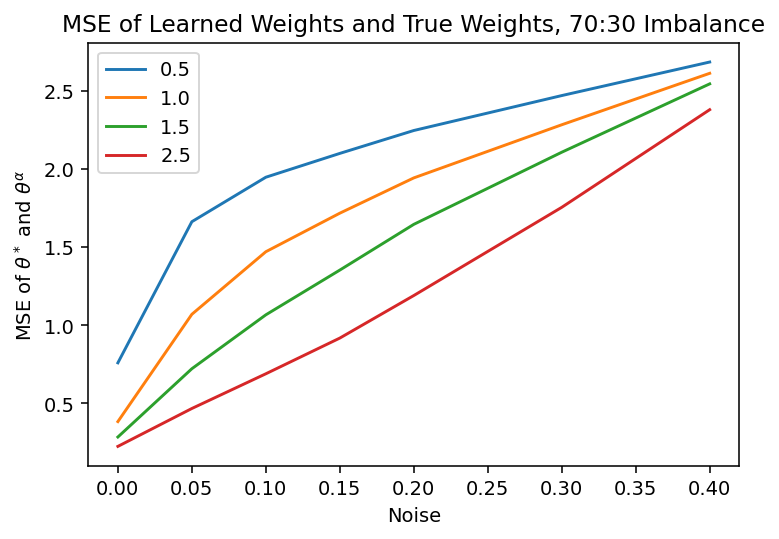

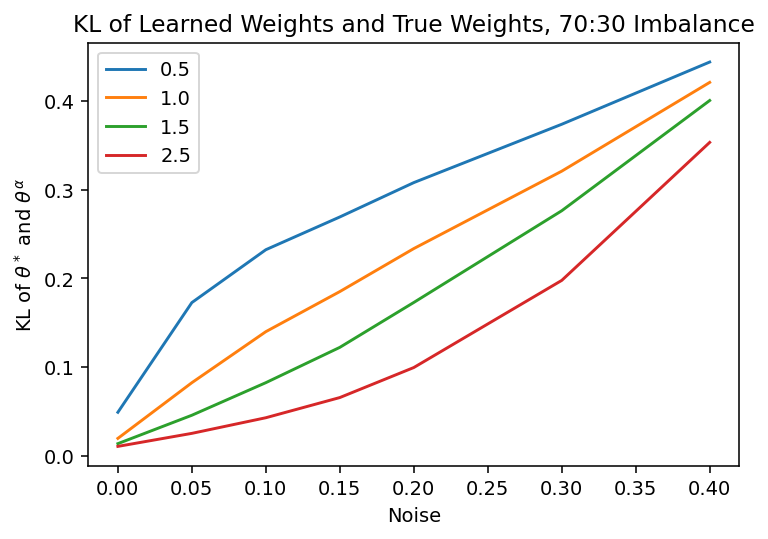

In [ ]:
df[df.imbalance==0.7][[*alpha_list, 'noise']].plot(x='noise',title='MSE of Learned Weights and True Weights, 70:30 Imbalance',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df.imbalance==0.7][[*alpha_list, 'noise']].plot(x='noise',title='KL of Learned Weights and True Weights, 70:30 Imbalance',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

TypeError: reduction operation 'argmin' not allowed for this dtype

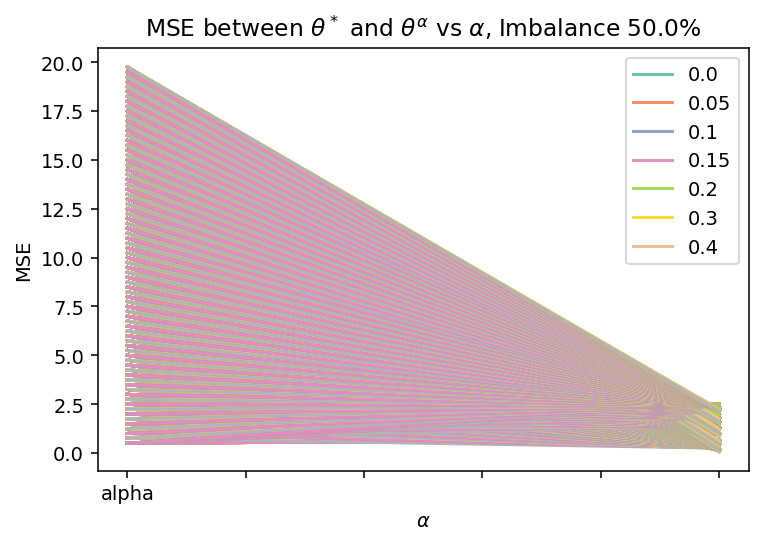

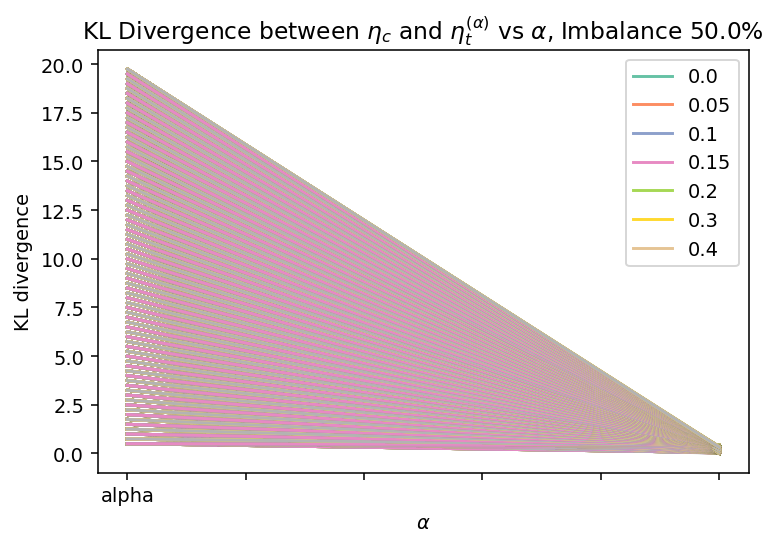

In [ ]:
balance = 0.5
df[df.imbalance==balance].iloc[:,:-2].T.plot(xlabel=r'$\alpha$', ylabel=r'MSE', title=r'MSE between $\theta^*$ and $\theta^{{\alpha}}$ vs $\alpha$, Imbalance {balance:.1%}'.format(balance=balance))
plt.legend([0.0,0.05, 0.1, 0.15, 0.2, 0.3, 0.4])
kl_df[kl_df.imbalance==balance].iloc[:,:-2].T.plot(xlabel=r'$\alpha$',ylabel=r'KL divergence', title=r'KL Divergence between $\eta_c$ and $\eta_t^{{(\alpha)}}$ vs $\alpha$, Imbalance {balance:.1%}'.format(balance=balance))
plt.legend([0.0,0.05, 0.1, 0.15, 0.2, 0.3, 0.4])
kl_df[kl_df.imbalance==balance].iloc[:,:-2].T.idxmin()
#df[df.imbalance==balance].iloc[:,:-2].T.idxmin()

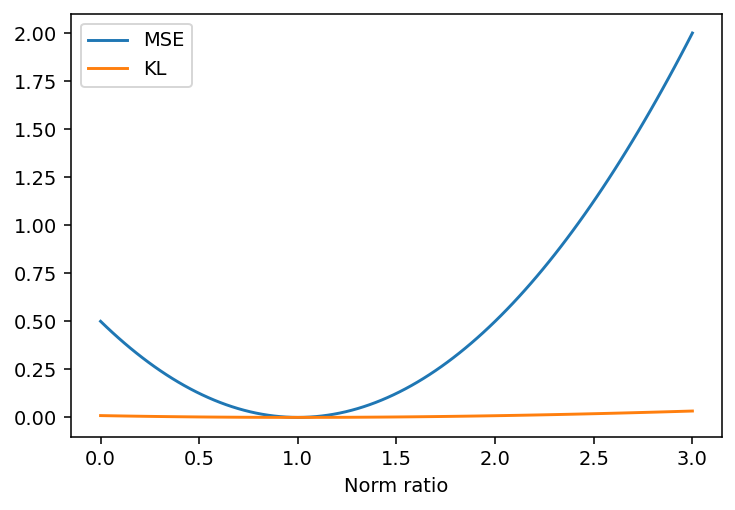

In [ ]:
from scipy.stats import entropy
def sigmoid(x):
    return 1/(1+np.exp(-x))
a = np.tile(np.array([np.sqrt(2)/2,-np.sqrt(2)/2]), (100,1))
x=np.linspace(0,3,100)
features = np.random.rand(2,1000)
plt.plot(x, np.square((a-x[:,np.newaxis]*a)).mean(axis=1), label='MSE')
plt.plot(x, entropy(sigmoid(a@features),sigmoid((x[:,np.newaxis]*a)@features), axis=1), label='KL')
plt.xlabel('Norm ratio')
plt.legend()

## Generate Reliability Diagram

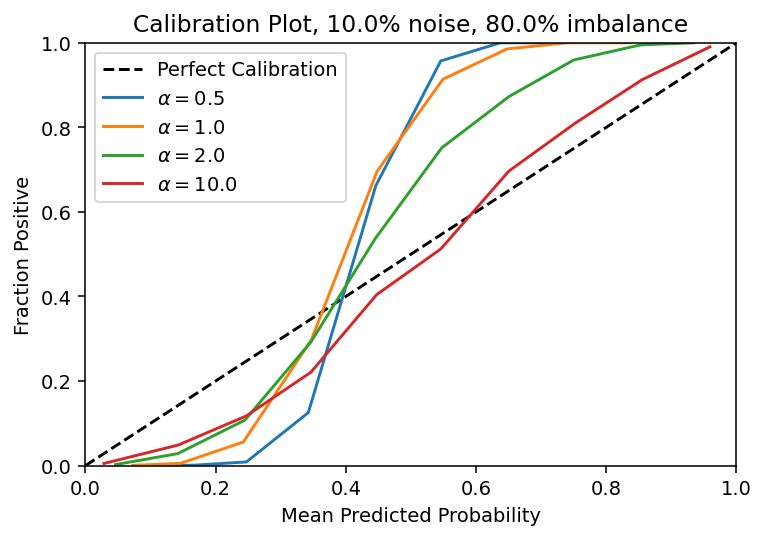

In [ ]:
from sklearn.calibration import calibration_curve
alphas = [0.5,1.0, 2.0, 10.0]
noise_list = [0.1]
imbalance_list = [0.8]
plt.title('Calibration Plot, {noise:.1%} noise, {imbalance:.1%} imbalance'.format(noise=noise_list[0], imbalance=imbalance_list[0]))
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction Positive')
plt.ylim((0,1))
plt.xlim((0,1))
plt.plot(np.linspace(0,1,5), np.linspace(0,1,5), linestyle='dashed', color='black', label='Perfect Calibration')
for (imbalance, noise, alpha) in [(i,n,a) for i in imbalance_list for n in noise_list for a in alphas]:
    posterior = np.load('posterior_{i}_{n}_{a}.npy'.format(i=imbalance, n=noise, a=alpha))
    y_test = np.load('y_test_{i}_{n}.npy'.format(i=imbalance, n = noise)).ravel()
    true_posterior = np.load('true_posterior_{i}_{n}.npy'.format(i=imbalance, n = noise))
    prob_true, prob_pred = calibration_curve(y_test, posterior, n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, label=r'$\alpha={}$'.format(alpha))
plt.legend()

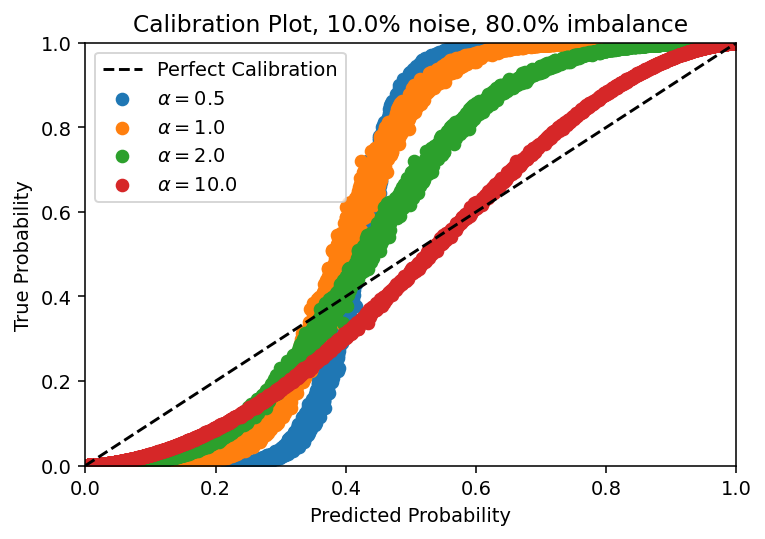

In [ ]:
alphas = [0.5,1.0, 2.0, 10.0]
noise_list = [0.1]
imbalance_list = [0.8]
plt.title('Calibration Plot, {noise:.1%} noise, {imbalance:.1%} imbalance'.format(noise=noise_list[0], imbalance=imbalance_list[0]))
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.ylim((0,1))
plt.xlim((0,1))
plt.plot(np.linspace(0,1,5), np.linspace(0,1,5), linestyle='dashed', color='black', label='Perfect Calibration')
for (imbalance, noise, alpha) in [(i,n,a) for i in imbalance_list for n in noise_list for a in alphas]:
    posterior = np.load('posterior_{i}_{n}_{a}.npy'.format(i=imbalance, n=noise, a=alpha))
    true_posterior = np.load('true_posterior_{i}_{n}.npy'.format(i=imbalance, n = noise))
    plt.scatter(posterior, true_posterior, label=r'$\alpha={}$'.format(alpha))
plt.legend()

In [ ]:
from scipy.stats import entropy
alpha_list = list(np.arange(0.5,20, 0.25))
imbalance_list = [0.5, 0.6, 0.7, 0.8, 0.9]
noise_list=[0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4]

clean_posterior = np.load('posterior_0.5_0.0_1.0.npy')
kl_clean_df = pd.DataFrame(columns=[*alpha_list, 'imbalance', 'noise'])

for (imbalance, noise) in ((i,n)for i in imbalance_list for n in noise_list):
    if 1-imbalance < noise/2: continue
    kl_list = []
    for alpha in alpha_list:
        posterior = np.load('posterior_{imbalance}_{noise}_{alpha}.npy'.format(imbalance=imbalance, noise=noise, alpha=alpha))
        kl = entropy([clean_posterior, 1-clean_posterior], [posterior, 1-posterior]).mean()
        kl_list.append(kl)
    kl_clean_df.loc[len(kl_clean_df)] = [*kl_list,imbalance, noise]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


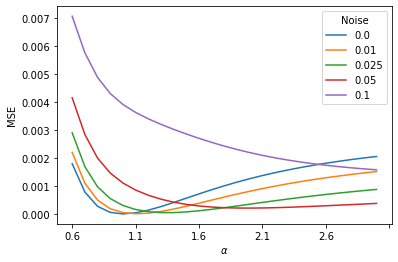

In [4]:
noise_subset = [0.0, 0.01, 0.025, 0.05, 0.1]
plt.rcParams['legend.loc']='upper left'
mse = pd.read_csv('mse.csv', index_col='Noise')
mse.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='MSE')
plt.legend(loc='upper right', title='Noise')
plt.savefig('mse_no_title.eps',format='eps',dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


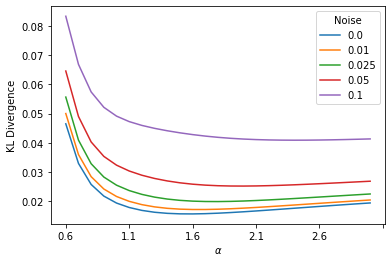

In [5]:
kl = pd.read_csv('kl.csv',index_col='noise')
kl.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='KL Divergence')
plt.legend(loc='upper right', title='Noise')
plt.savefig('kldiv_no_title.eps', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


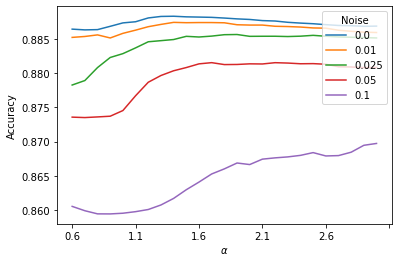

In [6]:
acc = pd.read_csv('acc.csv',index_col='noise') /100
acc.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='Accuracy')
plt.legend(loc='upper right', title='Noise')
plt.savefig('accuracy.eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


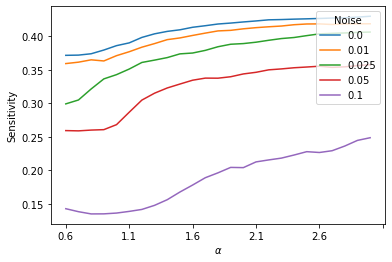

In [7]:
sensitivity = pd.read_csv('sensitivity.csv',index_col='noise')
sensitivity.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='Sensitivity')
plt.legend(loc='upper right', title='Noise')
plt.savefig('sensitivity.eps', dpi=1000)

(0.0, 1.0)

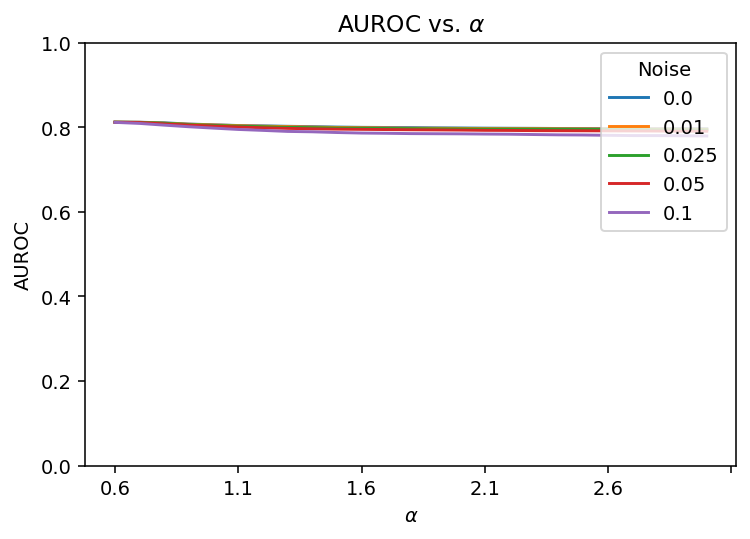

In [ ]:
auroc = pd.read_csv('auroc.csv',index_col='noise')
auroc.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='AUROC', title=r'AUROC vs. $\alpha$')
plt.legend(loc='upper right', title='Noise')
plt.ylim((0,1))

In [5]:
thetas = pd.read_pickle('theta.pkl')
thetas

,alpha,noise,imbalance,theta_0,theta_1,theta_2,mse,kl
0,0.5,0.0,0.5,0.002953,0.996942,1.056224,0.796994,0.045045
1,0.5,0.0,0.5,0.003126,0.996882,1.055866,0.797341,0.045071
2,0.5,0.0,0.5,0.003271,0.996982,1.055866,0.797341,0.045065
3,0.5,0.0,0.5,0.003033,0.997108,1.056104,0.796996,0.045042
4,0.5,0.0,0.5,0.003722,0.997388,1.055662,0.797410,0.045051
...,...,...,...,...,...,...,...,...
4795,20.0,0.2,0.2,-1.195389,1.002948,1.023004,0.731348,0.036046
4796,20.0,0.2,0.2,-1.014245,0.995696,1.297947,0.533418,0.026559
4797,20.0,0.2,0.2,-0.670293,1.271863,1.381832,0.304399,0.021939
4798,20.0,0.2,0.2,-0.934029,1.265660,1.043380,0.503049,0.025732


In [9]:
data = pd.read_csv('COVID-19 Logistic Model - added_fixed_coefs_lr.csv')

<AxesSubplot:xlabel='alpha', ylabel='kl-div'>

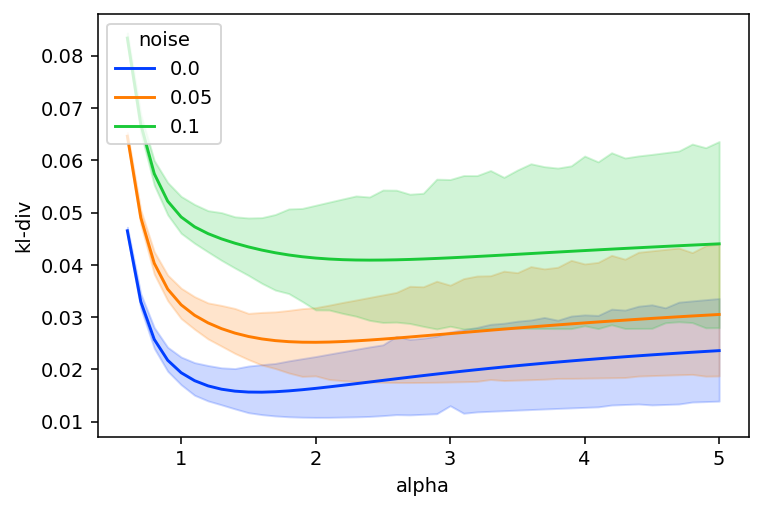

In [17]:
sns.lineplot(x='alpha', y='kl-div', hue='noise', data=data[(data.noise==0) | (data.noise==.1) | (data.noise == .05)], palette='bright')
plt.axvline(x=1.0, linestyle='dashed', color='black')